## Analysis of Language Model Outputs (Financial Prompts to financial test)

This notebook contains the analysis of outputs from GPT-3.5 (OpenAI) and PaLM2 (Bard) based on the provided dataset with financial news prompts tested on the same financial news. this notebook indicates how well the current LLMs are able to adapt to the same data provided in just few shot examples setting.

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [1]:
import pandas as pd

# Load the Excel file
data = pd.read_excel('/content/Predicted promptsf_to_f.xlsx')

# Display the first few rows of the dataset
data.head()


,Prompt,Original Label,Predicted label GPT3.5 (OpenAI),Context Learning (OpenAI),Predicted label PaLM 2 (Bard),Context Learning (Bard)
0,Your task is to do the classification. I will ...,no impact,positive,0,no impact,1
1,Your task is to do the classification. I will ...,positive,no impact,0,positive,1
2,Your task is to do the classification. I will ...,negative,negative,1,negative,1
3,Your task is to do the classification. I will ...,no impact,positive,0,positive,1
4,Your task is to do the classification. I will ...,positive,positive,1,positive,1


In [3]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Ground truth labels
ground_truth = data["Original Label"]

# Predicted labels for GPT-3.5
predicted_gpt = data["Predicted label GPT3.5 (OpenAI)"]

# Calculate metrics for GPT-3.5
accuracy_gpt = accuracy_score(ground_truth, predicted_gpt)
f1_gpt = f1_score(ground_truth, predicted_gpt, average='weighted')
precision_gpt = precision_score(ground_truth, predicted_gpt, average='weighted')
recall_gpt = recall_score(ground_truth, predicted_gpt, average='weighted')

accuracy_gpt, f1_gpt, precision_gpt, recall_gpt


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.4, 0.40130536130536126, 0.6560401002506265, 0.4)

In [4]:
# Predicted labels for PaLM2
predicted_palm = data["Predicted label PaLM 2 (Bard)"]

# Calculate metrics for PaLM2
accuracy_palm = accuracy_score(ground_truth, predicted_palm)
f1_palm = f1_score(ground_truth, predicted_palm, average='weighted')
precision_palm = precision_score(ground_truth, predicted_palm, average='weighted')
recall_palm = recall_score(ground_truth, predicted_palm, average='weighted')

accuracy_palm, f1_palm, precision_palm, recall_palm


(0.6, 0.5946153846153847, 0.7152000000000001, 0.6)

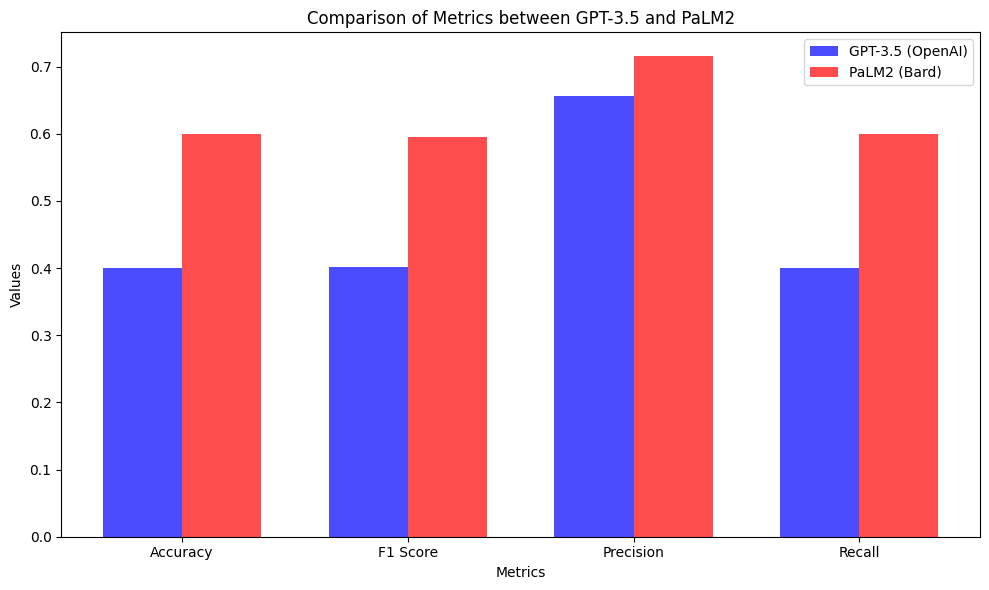

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
gpt_values = [accuracy_gpt, f1_gpt, precision_gpt, recall_gpt]
palm_values = [accuracy_palm, f1_palm, precision_palm, recall_palm]

# Bar width
bar_width = 0.35
index = np.arange(len(labels))

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, gpt_values, bar_width, label='GPT-3.5 (OpenAI)', color='b', alpha=0.7)
bar2 = ax.bar(index + bar_width, palm_values, bar_width, label='PaLM2 (Bard)', color='r', alpha=0.7)

# Label the chart
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Metrics between GPT-3.5 and PaLM2')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


In [6]:
# Context Learning Analysis for GPT-3.5
gpt_context_learning = data["Context Learning (OpenAI)"].mean()

# Context Learning Analysis for PaLM2
palm_context_learning = data["Context Learning (Bard)"].mean()

gpt_context_learning, palm_context_learning


(0.5, 0.7)

In [7]:
# Misclassification Analysis for GPT-3.5
gpt_misclassified = data[data["Original Label"] != data["Predicted label GPT3.5 (OpenAI)"]]
gpt_misclassification_counts = gpt_misclassified["Predicted label GPT3.5 (OpenAI)"].value_counts()

# Misclassification Analysis for PaLM2
palm_misclassified = data[data["Original Label"] != data["Predicted label PaLM 2 (Bard)"]]
palm_misclassification_counts = palm_misclassified["Predicted label PaLM 2 (Bard)"].value_counts()

gpt_misclassification_counts, palm_misclassification_counts


(negative     15
 positive     13
 no impact     1
  negative     1
 Name: Predicted label GPT3.5 (OpenAI), dtype: int64,
 positive     14
 negative      4
 no impact     2
 Name: Predicted label PaLM 2 (Bard), dtype: int64)

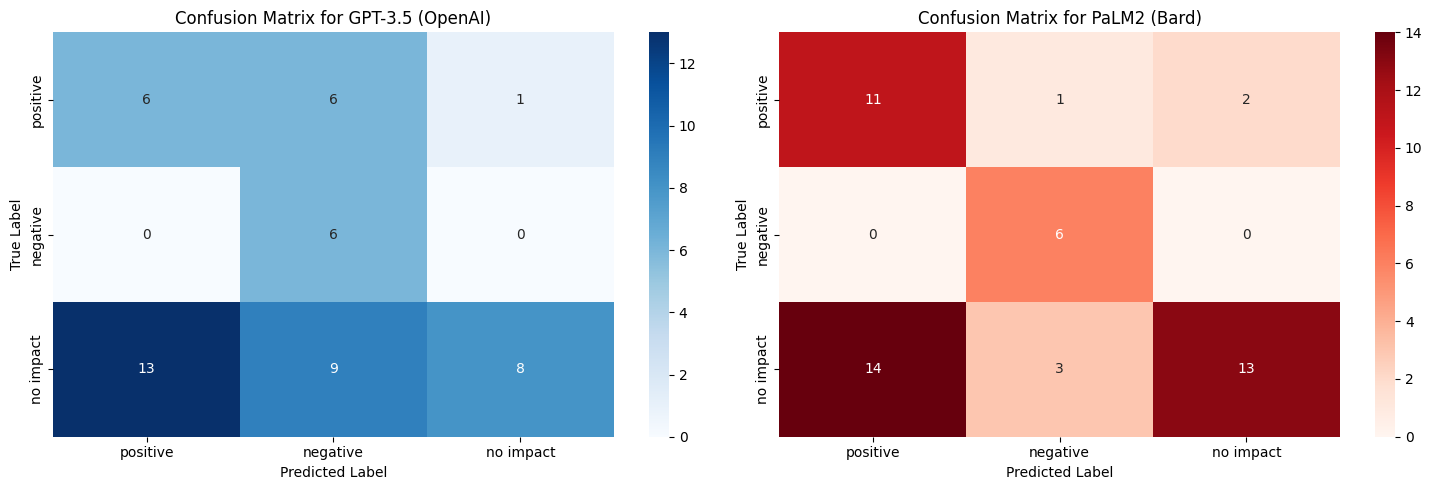

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrices
confusion_gpt = confusion_matrix(ground_truth, predicted_gpt, labels=['positive', 'negative', 'no impact'])
confusion_palm = confusion_matrix(ground_truth, predicted_palm, labels=['positive', 'negative', 'no impact'])

# Plotting confusion matrix for GPT-3.5
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_gpt, annot=True, fmt='d', cmap='Blues', ax=ax[0],
            xticklabels=['positive', 'negative', 'no impact'],
            yticklabels=['positive', 'negative', 'no impact'])
ax[0].set_title('Confusion Matrix for GPT-3.5 (OpenAI)')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Plotting confusion matrix for PaLM2
sns.heatmap(confusion_palm, annot=True, fmt='d', cmap='Reds', ax=ax[1],
            xticklabels=['positive', 'negative', 'no impact'],
            yticklabels=['positive', 'negative', 'no impact'])
ax[1].set_title('Confusion Matrix for PaLM2 (Bard)')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()
